># **`Arya Chakraborty - 22MSD7020`**
> **`Lab Assignment -4 (Gender Classification)`**:

># **`Classifying Facial Images as either belonging to the Male or the Female class`**:👨🚺

>- **Importing Libraries** 🎈

In [1]:
import numpy as np
import zipfile
import os
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

- **Mounting the Google Drive**

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


- **Loading the Zip file & Extracting the Image folder and the train dataset**📁

- **Not required to run this snippet multiple times😥**

In [4]:
extraction_directory = '/content/drive/MyDrive/Colab Notebooks'
if not os.path.exists(extraction_directory):
    os.makedirs(extraction_directory)


with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/BIC_Train_data_&_Images.zip', 'r') as zip_ref:
    file_names = zip_ref.namelist()
    print(f"Files in the zip archive: {file_names}")

    zip_ref.extractall(os.path.join(extraction_directory, 'BIC_extraction_folder'))

    zip_ref.extract('train.csv',extraction_directory)

Files in the zip archive: ['images/', 'images/0.jpg', 'images/1.jpg', 'images/10.jpg', 'images/100.jpg', 'images/1000.jpg', 'images/10000.jpg', 'images/10001.jpg', 'images/10002.jpg', 'images/10003.jpg', 'images/10004.jpg', 'images/10005.jpg', 'images/10006.jpg', 'images/10007.jpg', 'images/10008.jpg', 'images/10009.jpg', 'images/1001.jpg', 'images/10010.jpg', 'images/10011.jpg', 'images/10012.jpg', 'images/10013.jpg', 'images/10014.jpg', 'images/10015.jpg', 'images/10016.jpg', 'images/10017.jpg', 'images/10018.jpg', 'images/10019.jpg', 'images/1002.jpg', 'images/10020.jpg', 'images/10021.jpg', 'images/10022.jpg', 'images/10023.jpg', 'images/10024.jpg', 'images/10025.jpg', 'images/10026.jpg', 'images/10027.jpg', 'images/10028.jpg', 'images/10029.jpg', 'images/1003.jpg', 'images/10030.jpg', 'images/10031.jpg', 'images/10032.jpg', 'images/10033.jpg', 'images/10034.jpg', 'images/10035.jpg', 'images/10036.jpg', 'images/10037.jpg', 'images/10038.jpg', 'images/10039.jpg', 'images/1004.jpg', 

- **Loading the train data**🚂

In [33]:
train_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BIC_extraction_folder/train.csv")

train_data.head(20)

,image_names,class
0,11413.jpg,1
1,9863.jpg,1
2,997.jpg,0
3,5950.jpg,0
4,10454.jpg,1
5,7508.jpg,1
6,7288.jpg,1
7,9602.jpg,1
8,9028.jpg,0
9,12791.jpg,0


- **Loading the test data**🧪

In [32]:
test_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/test.csv")
test_data.head()

,image_names
0,5603.jpg
1,1286.jpg
2,9815.jpg
3,8865.jpg
4,9306.jpg


- **saving the important paths**🤦🤦

In [8]:
train_csv_file_path = "/content/drive/MyDrive/Colab Notebooks/BIC_extraction_folder/train.csv"
images_path = "/content/drive/MyDrive/Colab Notebooks/BIC_extraction_folder/images/"
image_filename_column = 'image_names'

- ### **Using VGG16 pretrained model for fitting the data**

- **Sample Photo**😉

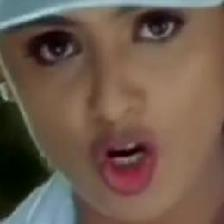

In [34]:
Image.open('/content/drive/MyDrive/Colab Notebooks/BIC_extraction_folder/images/22994.jpg')

In [10]:
image_size = (224, 224)
batch_size = 64

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

- **Creating Train & Test Data Generator from the train_data itself**

In [11]:
train_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=images_path,
    x_col='image_names',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='raw',
    subset='training'

valid_generator = train_datagen.flow_from_dataframe(
    dataframe=train_data,
    directory=images_path,
    x_col='image_names',
    y_col='class',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='raw',
    subset='validation'
)


Found 9757 validated image filenames.
Found 2439 validated image filenames.


- **Importing the libraries for building the model**

In [12]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

- **Creating the Model Architecture**🤖

In [13]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model = Sequential([
    base_model,
    Flatten(),
    Dense(50, activation='relu'),
    Dense(30, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


58889256/58889256 [==============================] - 0s 0us/step


- **keeping the epocha low because of computational limit**😥😥

In [14]:
epochs = 5

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=epochs,
    verbose=1
)

Epoch 1/5
153/153 [==============================] - 169s 874ms/step - loss: 0.7457 - accuracy: 0.5087 - val_loss: 0.6967 - val_accuracy: 0.4928
Epoch 2/5
153/153 [==============================] - 123s 802ms/step - loss: 0.6943 - accuracy: 0.5098 - val_loss: 0.6931 - val_accuracy: 0.5072
Epoch 3/5
153/153 [==============================] - 124s 808ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6930 - val_accuracy: 0.5072
Epoch 4/5
153/153 [==============================] - 124s 812ms/step - loss: 0.6931 - accuracy: 0.5060 - val_loss: 0.6930 - val_accuracy: 0.5072
Epoch 5/5
153/153 [==============================] - 124s 812ms/step - loss: 0.6932 - accuracy: 0.5060 - val_loss: 0.6930 - val_accuracy: 0.5072


- **Using first 10 images from the test_data for validation**

1/1 [==============================] - 0s 33ms/step


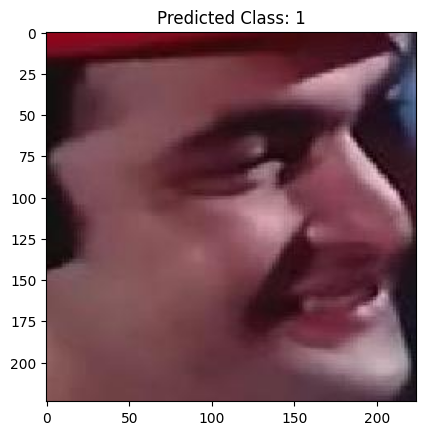

1/1 [==============================] - 0s 20ms/step


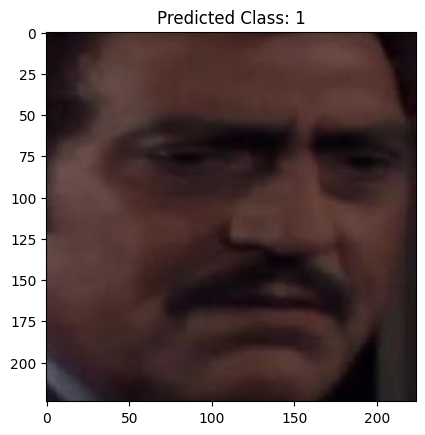

1/1 [==============================] - 0s 25ms/step


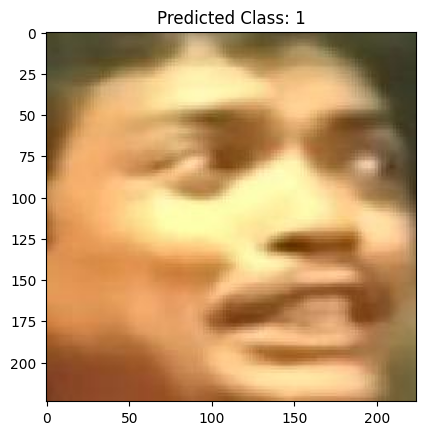

1/1 [==============================] - 0s 24ms/step


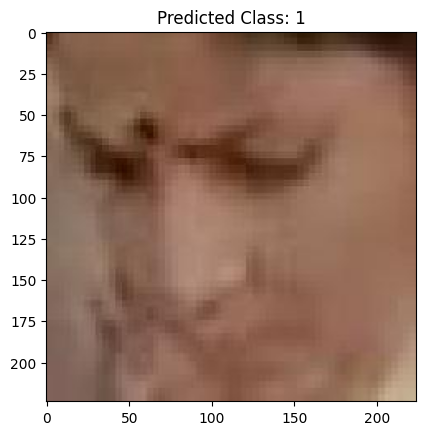

1/1 [==============================] - 0s 29ms/step


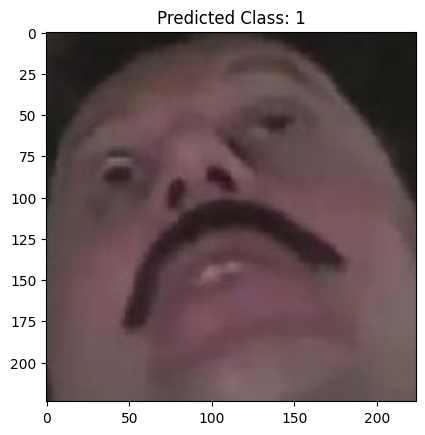

1/1 [==============================] - 0s 22ms/step


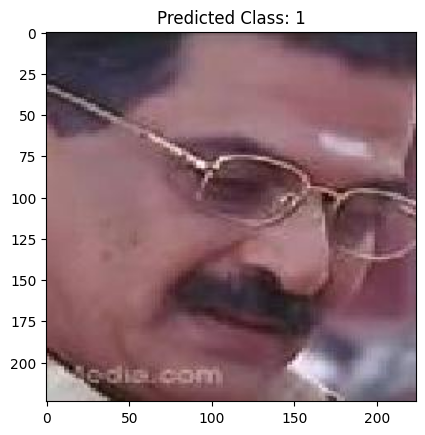

1/1 [==============================] - 0s 21ms/step


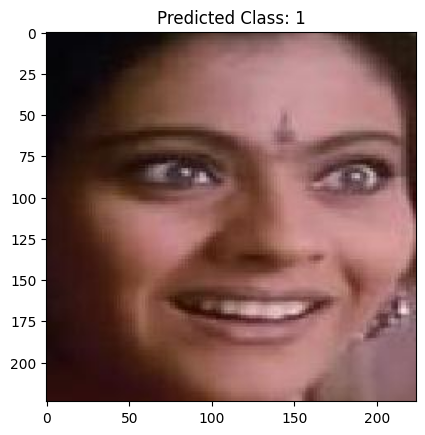

1/1 [==============================] - 0s 19ms/step


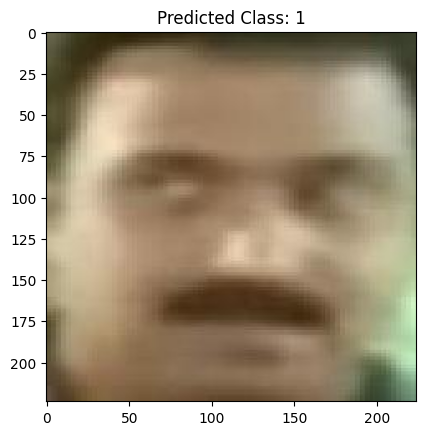

1/1 [==============================] - 0s 22ms/step


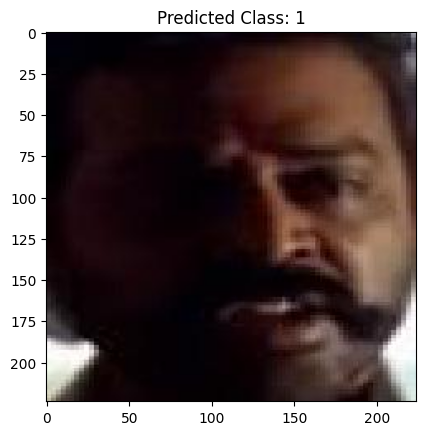

1/1 [==============================] - 0s 20ms/step


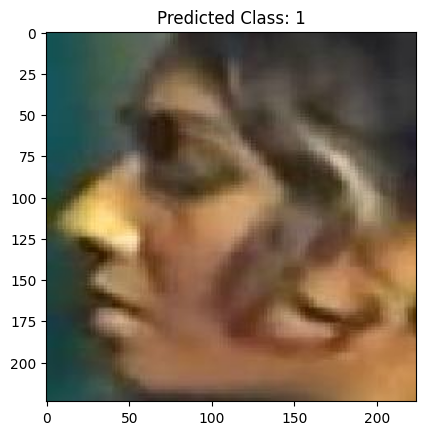

In [44]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import numpy as np

# Take 10 image names from test_data
sample_image_names = test_data['image_names'][:10]

# Load and display images along with their predicted class
for image_name in sample_image_names:

    img_path = f'{images_path}/{image_name}'
    img = image.load_img(img_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x /= 255

    # Predict class
    prediction = model.predict(x)
    predicted_class = (prediction >= 0.5).astype(int)[0][0]  # Apply threshold and get class

    # Display image and predicted class
    plt.imshow(img)
    plt.title(f'Predicted Class: {predicted_class}')
    plt.show()
